In [1]:
import pandas as pd
import os
import numpy as np
import pathlib
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import pickle

In [7]:
x = []
y = []
path1 = "C://Users//DELL//Downloads//2D geometric shapes dataset//2D geometric shapes dataset//dataset//output"
class_names =['Triangle', 'Square', 'Pentagon', 'Hexagon', 'Heptagon', 'Octagon', 'Nonagon', 'Circle' , 'Star']

for filename in tqdm(os.listdir(path1)):
    img = Image.open(os.path.join(path1,filename))
    img = img.resize((28,28))
    img_array = np.array(img)
    x.append(img_array)
    name = filename.split('_')[0]
    if 'Triangle' == name:
            y.append(0)
    elif 'Square' == name:
            y.append(1)
    elif 'Pentagon' == name:
            y.append(2)
    elif 'Hexagon' == name:
            y.append(3)
    elif 'Heptagon' == name:
            y.append(4)
    elif 'Octagon' == name:
            y.append(5)
    elif 'Nonagon' == name:
            y.append(6)
    elif 'Circle' == name:
            y.append(7)
    elif 'Star' == name:
            y.append(8)

100%|███████████████████████████████████████████████████████████████████████████| 90000/90000 [04:20<00:00, 345.62it/s]


In [8]:
#X = np.array(x)
#Y = np.array(y)

#pickle_out = open("X.pickle","wb")
#pickle.dump(X,pickle_out)
#pickle_out.close()

#pickle_out = open("Y.pickle","wb")
#pickle.dump(Y,pickle_out)
#pickle_out.close()

class_names =['Triangle', 'Square', 'Pentagon', 'Hexagon', 'Heptagon', 'Octagon', 'Nonagon', 'Circle' , 'Star']

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

train_image, test_image, train_label,test_label = train_test_split(X, Y,test_size=0.2,random_state = 42)

In [9]:
print("Shape of train images is: ", train_image.shape)
print("Len of train labels is: ", len(train_label))
print(train_label)
print("Shape of test images is: ", test_image.shape)
print("Len of test labels is: ", len(test_label))
print(test_label)

Shape of train images is:  (72000, 28, 28, 3)
Len of train labels is:  72000
[2 4 7 ... 8 7 4]
Shape of test images is:  (18000, 28, 28, 3)
Len of test labels is:  18000
[0 4 2 ... 2 2 2]


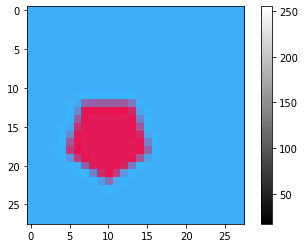

In [10]:
plt.figure()
plt.imshow(train_image[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_image = train_image / 255.0
test_image = test_image / 255.0

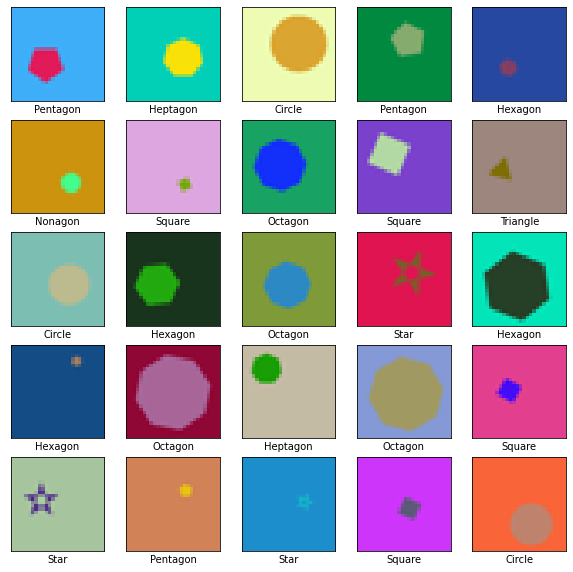

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i])
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [13]:
#model = keras.Sequential([
#    keras.layers.Flatten(),
#    keras.layers.Dense(512,activation=tf.nn.relu),
#    keras.layers.Dense(256,activation=tf.nn.relu),
#    keras.layers.Dense(128,activation=tf.nn.relu),
#    keras.layers.Dense(512,activation=tf.nn.relu),
#    keras.layers.Dense(256,activation=tf.nn.relu),
#    keras.layers.Dense(128,activation=tf.nn.relu),
#    keras.layers.Dense(9, activation=tf.nn.softmax)
#])

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=train_image.shape[1:]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(9, activation='softmax'),
])

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(train_image, train_label, epochs=10)

Train on 72000 samples
Epoch 1/10
72000/72000 [==============================] - 139s 2ms/sample - loss: 1.9462 - accuracy: 0.2280
Epoch 2/10
72000/72000 [==============================] - 120s 2ms/sample - loss: 1.4467 - accuracy: 0.4268
Epoch 3/10
72000/72000 [==============================] - 134s 2ms/sample - loss: 1.0840 - accuracy: 0.5763
Epoch 4/10
72000/72000 [==============================] - 142s 2ms/sample - loss: 0.8826 - accuracy: 0.6597
Epoch 5/10
72000/72000 [==============================] - 138s 2ms/sample - loss: 0.7712 - accuracy: 0.7043
Epoch 6/10
72000/72000 [==============================] - 152s 2ms/sample - loss: 0.6925 - accuracy: 0.7351
Epoch 7/10
72000/72000 [==============================] - 145s 2ms/sample - loss: 0.6345 - accuracy: 0.7558
Epoch 8/10
72000/72000 [==============================] - 149s 2ms/sample - loss: 0.5882 - accuracy: 0.7735
Epoch 9/10
72000/72000 [==============================] - 134s 2ms/sample - loss: 0.5498 - accuracy: 0.7878
Epoch

In [17]:
model.evaluate(test_image,test_label)

18000/18000 [==============================] - 8s 429us/sample - loss: 0.5736 - accuracy: 0.7742


[0.5735698581536611, 0.7742222]

In [18]:
predictions = model.predict(test_image)
index = 0
print(predictions[index])
print(class_names[np.argmax(predictions[index])])
print(class_names[test_label[index]])

[1.0000000e+00 4.0336673e-08 1.1337737e-18 1.0440519e-24 1.6614385e-28
 1.4740740e-32 2.3256303e-36 0.0000000e+00 1.1192826e-19]
Triangle
Triangle


In [19]:
output = model.predict(test_image)
y_pred = np.argmax(output,axis=1)

In [20]:
print(classification_report(y_pred,test_label))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1925
           1       0.91      0.88      0.90      2122
           2       0.82      0.85      0.83      1930
           3       0.74      0.83      0.78      1756
           4       0.69      0.68      0.69      1993
           5       0.56      0.70      0.62      1629
           6       0.59      0.60      0.60      2007
           7       0.80      0.61      0.69      2582
           8       0.93      0.90      0.91      2056

    accuracy                           0.77     18000
   macro avg       0.77      0.78      0.77     18000
weighted avg       0.78      0.77      0.77     18000



In [21]:
print(confusion_matrix(test_label,y_pred))

[[1833   57    0    0    1    2    5    2   55]
 [  34 1872   66    5    7    6    7   14   50]
 [   5   52 1634  134   58   13   35   37   25]
 [   2   20   75 1461  239   29   63   75   17]
 [   2   15   30   67 1361  237  109  136   14]
 [   1   18   38   28  151 1136  411  227   15]
 [   4   14   33   30   98  135 1208  501   19]
 [   3   16   34   28   78   70  161 1585   15]
 [  41   58   20    3    0    1    8    5 1846]]


In [22]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array, true_label,img = predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img,cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color = color)

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


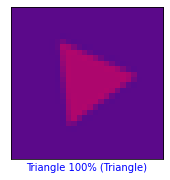

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_label,test_image)
plt.subplot(1,2,1)
plt.show()

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


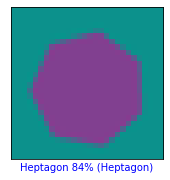

In [24]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_label,test_image)
plt.subplot(1,2,1)
plt.show()

In [25]:
model.save('model.h5')